In [1]:
###Run this code to create a JSON file that diables auto-quotes and auto-brackets. After executing the Python 
#command, or manually creating the file, restart your Jupyter notebook, and it should stop auto-closing quotes
#and brackets.

#from notebook.services.config import ConfigManager
#c = ConfigManager()
#c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

###Keyboard Shortcuts
#Ctrl + Enter: Run single cell of code (similar to R)
#Ctrl + Shift + Enter: Run entire notebook (similar to R)

In [2]:
#Intro to Web Scraping and BeautifulSoup
#https://www.youtube.com/watch?v=XQgXKtPSzUI

#exporting to excel
#df.to_excel("excel_file_name.xlsx")

import math
import pandas as pd
import numpy as np
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt
import copy #for making shallow & deep copies
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#import re #for splitting strings using multiple delimiters
import time
import random
from mpl_toolkits import mplot3d #for 3D plots

premieres = []
genres = []
scores = []
episodes = []
durations = []

In [3]:
date = '2020_04_08' #date format 2020_01_01

#Reading in raw export file from MAL
file_name_1 = 'in_rawMAL_%s.xlsx' % date
df0 = pd.read_excel(file_name_1)

#Removing unnecessary extra columns
columns = [11,14,19,21,23,25,26]
df = df0.iloc[:,columns]

#Renaming column names
df = df.rename(columns={'/anime/my_score':'myscore','/anime/my_status':'status','/anime/my_watched_episodes':'watched', \
                        '/anime/series_animedb_id':'id','/anime/series_episodes':'episodes', \
                        '/anime/series_title':'title','/anime/series_type':'type'})

#df = df.iloc[[169,207,105],:]
#df = df.reset_index(drop=True) #reset df indecies
df

,myscore,status,watched,id,episodes,title,type
0,6,Completed,12,38101,12,5-toubun no Hanayome,TV
1,0,Plan to Watch,0,39783,0,5-toubun no Hanayome ∬,TV
2,4,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA
3,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA
4,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA
5,0,Plan to Watch,0,40215,0,Aggressive Retsuko (ONA) 3rd Season,ONA
6,8,Completed,1,38815,1,Aggressive Retsuko: We Wish You a Metal Christmas,ONA
7,8,Completed,12,34881,12,Aho Girl,TV
8,0,Dropped,3,34350,12,Alice to Zouroku,TV
9,0,Plan to Watch,0,9989,11,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,TV


In [4]:
"""
premieres = []
genres = []
scores = []
episodes = []
durations = []

#Creating complete df

#Open pages to scrape more data about shows
for i in range(len(df)): #number of rows of df
    #wait random time between 0-5 seconds before scraping data
    r = random.randint(0,2)
    time.sleep(r)

    URL = 'https://myanimelist.net/anime/%d/' % df.loc[i,'id']
    page = urlopen(URL)
    soup = BeautifulSoup(page,'html.parser')
    #finding all span-dark_text containers i.e. bolded text on left
    containers = soup.findAll('span',attrs={'class':'dark_text'})

    
    ####Getting container indecies
    #'Premiered' for type TV, 'Aired' for non-TV types
    if df.loc[i,'type'] == 'TV':
        keyword = 'Premiered'
    else:
        keyword = 'Aired'
    
    
    for t in range(len(containers)):
        #Extracts title texts and looks for index_container for Premiered or Aired
        if keyword in containers[t].text:
            index_container_premiered = t   
        #Extracts title texts and looks for index_container for Genre
        elif 'Genres' in containers[t].text:
            index_container_genre = t
        #Extracts title texts and looks for index_container for Score
        elif 'Score' in containers[t].text:
            index_container_score = t
        #Extracts title texts and looks for index_container for Episode
        elif 'Episodes' in containers[t].text:
            index_container_episode = t
        #Extracts title texts and looks for index_container for Duration
        elif 'Duration' in containers[t].text:
            index_container_duration = t
            
            
    ####Looks at parent object for easy access to div container much easier than findAll('div')
    if keyword == 'Premiered':
        premiere = containers[index_container_premiered].parent.text.strip() #outputs of this form 'Premiered:\nFall 2017'
        separate_index = premiere.find('\n')+1 #from START of string, look for 1st instance of '\n'
        premiere = premiere[separate_index:]
        premieres = premieres + [premiere]
    elif keyword == 'Aired':
        premiere = containers[index_container_premiered].parent.text.strip() #outputs of this form 'Aired:\n Dec 10, 2005'
        separate_index = premiere.find('\n')+1 #from START of string, look for 1st instance of '\n'
        premiere = premiere[separate_index:]
        premieres = premieres + [premiere]

    container_parent = containers[index_container_genre].parent
    list_genres = container_parent.findAll('span')
    genre = []
    for g in list_genres[1:]: #exlcuding the first span object, which is the text 'Genres:'
        genre = genre + [g.text]
    genres = genres + [genre]

    score = containers[index_container_score].parent.text.strip() #outputs of this form: see above
    score = score[7:11] #only extracting float X.XX
    scores = scores + [score]
    
    episode = containers[index_container_episode].parent.text.strip() #outputs of this form: see above
    separate_index = episode.rfind(' ')+1 #from END of string, look for 1st instance of space
    episode = episode[separate_index:]
    episodes = episodes + [episode]
    
    duration = containers[index_container_duration].parent.text.strip() #outputs of this form: see above
    #need to convert duration to minutes for type movie, normal duration for non-movie types
    if (df.loc[i,'type'] == 'Movie') and (df.loc[i,'status'] == 'Plan to Watch'):
        duration = 0
    elif df.loc[i,'type'] == 'Movie':
        separate_index = duration.find(' ')+2 #from START of string, look for 1st instance of space
        separate_index2 = duration.find(' ',separate_index) #from seperate_index, look for 2nd instance of space
        #If minute amount is present in duration
        if 'min' in duration:
            separate_index3 = duration.find(' ',separate_index2+1)+1 #from seperate_index2+1, look for 3rd instance of space
            separate_index4 = duration.find(' ',separate_index3) #from seperate_index3, look for 4th instance of space
            minute = duration[separate_index3:separate_index4]
        else: #special case where movie is exactly 1 hour and no minute amount is present, set minute=0
            minute = 0
        hour = duration[separate_index:separate_index2]
        duration = int(hour)*60 + int(minute)
    else:
        separate_index = duration.find(' ')+2 #from START of string, look for 1st instance of space
        separate_index2 = duration.find(' ',separate_index) #from seperate_index, look for 2nd instance of space
        duration = duration[separate_index:separate_index2]        
    
    durations = durations + [duration]
    
df['premiered'] = premieres
df['genres'] = genres
df['score'] = scores
df['episodes'] = episodes
df['duration'] = durations
df
"""

"\npremieres = []\ngenres = []\nscores = []\nepisodes = []\ndurations = []\n\n#Creating complete df\n\n#Open pages to scrape more data about shows\nfor i in range(len(df)): #number of rows of df\n    #wait random time between 0-5 seconds before scraping data\n    r = random.randint(0,2)\n    time.sleep(r)\n\n    URL = 'https://myanimelist.net/anime/%d/' % df.loc[i,'id']\n    page = urlopen(URL)\n    soup = BeautifulSoup(page,'html.parser')\n    #finding all span-dark_text containers i.e. bolded text on left\n    containers = soup.findAll('span',attrs={'class':'dark_text'})\n\n    \n    ####Getting container indecies\n    #'Premiered' for type TV, 'Aired' for non-TV types\n    if df.loc[i,'type'] == 'TV':\n        keyword = 'Premiered'\n    else:\n        keyword = 'Aired'\n    \n    \n    for t in range(len(containers)):\n        #Extracts title texts and looks for index_container for Premiered or Aired\n        if keyword in containers[t].text:\n            index_container_premiered =

In [5]:
#grab english title names
#scrape MAL for myscore instead of downloading & importing

In [6]:
"""
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)
df
"""

"\n# Set it None to display all rows in the dataframe\npd.set_option('display.max_rows', None)\ndf\n"

In [7]:
#Export concatinated df to Excel
file_name_2 = 'df_%s.xlsx' % date
#df.to_excel(file_name_2)

#Converting exported df back into correct format
df = pd.read_excel(file_name_2)
#df = df.drop(columns='Unnamed: 0') #removing column of indecies

#When exporting, genres entries got converted from list type to string
#Converting string representation of list to list type
import ast
genres = []
for i in range(len(df)):
    ini_list = df.loc[i,'genres']
    res = ast.literal_eval(ini_list) # Converting string to list 
    genres = genres + [res]
df['genres'] = genres

#When exporting, score entries got converted from numeric to string
#Converting string to float and int
df['score'] = pd.to_numeric(df['score'],errors='coerce') #'coerce' option turns non-floats into NAs
df['episodes'] = pd.to_numeric(df['episodes'],errors='coerce') #'coerce' option turns non-floats into NAs
df['duration'] = pd.to_numeric(df['duration'],errors='coerce') #'coerce' option turns non-floats into NAs
df = df.replace(np.nan, 0, regex=True)
df['episodes'] = df['episodes'].astype(int)
df['duration'] = df['duration'].astype(int)
df


,myscore,status,watched,id,episodes,title,type,premiered,genres,score,duration
0,6,Completed,12,38101,12,5-toubun no Hanayome,TV,Winter 2019,"[Harem, Comedy, Romance, School, Shounen]",7.62,24
1,0,Plan to Watch,0,39783,0,5-toubun no Hanayome ∬,TV,Fall 2020,"[Harem, Comedy, Romance, School, Shounen]",0.00,0
2,4,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA,"Mar 9, 2018","[Action, Sci-Fi]",6.75,24
3,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA,"Apr 20, 2018","[Slice of Life, Comedy]",7.76,15
4,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA,"Jun 14, 2019","[Comedy, Slice of Life]",7.84,16
5,0,Plan to Watch,0,40215,0,Aggressive Retsuko (ONA) 3rd Season,ONA,Not available,"[Comedy, Slice of Life]",0.00,16
6,8,Completed,1,38815,1,Aggressive Retsuko: We Wish You a Metal Christmas,ONA,"Dec 20, 2018","[Slice of Life, Comedy]",7.33,22
7,8,Completed,12,34881,12,Aho Girl,TV,Summer 2017,"[Comedy, Romance, School, Shounen]",7.07,12
8,0,Dropped,3,34350,12,Alice to Zouroku,TV,Spring 2017,"[Adventure, Mystery, Seinen]",7.16,23
9,0,Plan to Watch,0,9989,11,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,TV,Spring 2011,"[Slice of Life, Supernatural, Drama]",8.48,22


In [8]:
#df subset - Only looking at scored series, watched more than 5 epsisodes
DFA = df.loc[df['myscore'] > 0]
#DFA = DFA.loc[DFA['status']=='Completed']
DFA = DFA.reset_index(drop=True) #reset df indecies
DFA

,myscore,status,watched,id,episodes,title,type,premiered,genres,score,duration
0,6,Completed,12,38101,12,5-toubun no Hanayome,TV,Winter 2019,"[Harem, Comedy, Romance, School, Shounen]",7.62,24
1,4,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA,"Mar 9, 2018","[Action, Sci-Fi]",6.75,24
2,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA,"Apr 20, 2018","[Slice of Life, Comedy]",7.76,15
3,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA,"Jun 14, 2019","[Comedy, Slice of Life]",7.84,16
4,8,Completed,1,38815,1,Aggressive Retsuko: We Wish You a Metal Christmas,ONA,"Dec 20, 2018","[Slice of Life, Comedy]",7.33,22
5,8,Completed,12,34881,12,Aho Girl,TV,Summer 2017,"[Comedy, Romance, School, Shounen]",7.07,12
6,7,Completed,22,24833,22,Ansatsu Kyoushitsu,TV,Winter 2015,"[Action, Comedy, School, Shounen]",8.16,23
7,7,Completed,25,30654,25,Ansatsu Kyoushitsu 2nd Season,TV,Winter 2016,"[Action, Comedy, School, Shounen]",8.59,23
8,7,Completed,1,1961,1,Arashi no Yoru ni,Movie,"Dec 10, 2005","[Adventure, Comedy, Drama, Fantasy]",7.74,107
9,6,Watching,0,40128,0,Arte,TV,Spring 2020,"[Slice of Life, Historical, Drama, Romance, Se...",7.25,0


In [9]:
#Season Columns
years = ['' for i in range(len(DFA))]
seasons = ['' for i in range(len(DFA))]
names_season = ['Winter','Spring','Summer','Fall']
names_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(len(DFA)):
    premiere = DFA['premiered'][i]
    premiere_split = premiere.split()
    
    #Extract the year from premiere, last 4 characters
    years[i] = premiere[-4:]
    
    #Seasons - type TV shows
    if premiere_split[0] in names_season:
        seasons[i] = premiere_split[0]
    #Seasons - type ONA, OVA, Movie
    elif premiere_split[0] in names_month:
        index = names_month.index(premiere_split[0])
        if 0 <= index & index <= 2:
            seasons[i] = 'Winter'
        elif 3 <= index & index <= 5:
            seasons[i] = 'Spring'
        elif 6 <= index & index <= 8:
            seasons[i] = 'Summer'
        elif 9 <= index & index <= 11:
            seasons[i] = 'Fall'
        else:
            print("Error: Month not in Seasons")

DFA['season'] = seasons
DFA['year'] = years

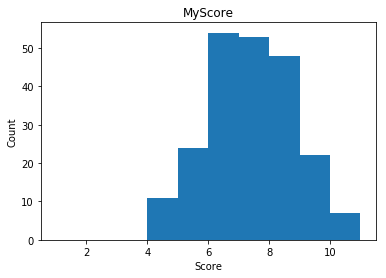

MyScore Mean: 6.900
MyScore St. Dev.: 1.427


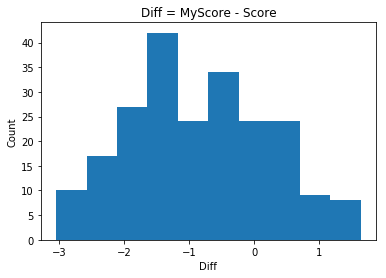

In [10]:
#MyScore distribution
a = DFA.loc[:,'myscore']
a = a.astype(int).tolist()
plt.hist(a,bins=range(1,12))
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('MyScore')
plt.show()

print('MyScore Mean: %.3f' % np.mean(a))
print('MyScore St. Dev.: %.3f' % np.std(a))

#Score Difference distribution
scores_diff = DFA.loc[:,'myscore'] - DFA.loc[:,'score']
plt.hist(scores_diff)
plt.xlabel('Diff')
plt.ylabel('Count')
plt.title('Diff = MyScore - Score')
plt.show()

DFA['diff'] = scores_diff

In [11]:
#MyScore counts raw distribution
counts_myscore_raw = [a.count(i) for i in range(1,11)]
counts_myscore_raw_round = ["{}%".format(round(counts_myscore_raw[i]/sum(counts_myscore_raw)*100)) \
                            for i in range(10)]
counts_myscore_round_ideal = ['0%','0%','0%','<5%','14%','27%','27%','18%','9%','<5%']
print(counts_myscore_raw)
print(counts_myscore_raw_round)
print(counts_myscore_round_ideal)

[0, 0, 0, 11, 24, 54, 53, 48, 22, 7]
['0%', '0%', '0%', '5%', '11%', '25%', '24%', '22%', '10%', '3%']
['0%', '0%', '0%', '<5%', '14%', '27%', '27%', '18%', '9%', '<5%']


In [12]:
#Weighted MyScore counts distribution
#(i.e. taking into account that score of 8 is not the same for full TV season vs single OVA episode)
#1 movie (1hr45min) ~ 6 TV episodes (half a season; 0.5)
#1 OVA episode ~ 1 TV epsisode (1/12 a season; 0.083)
#1 shortform anime ~ 6 TV episodes (half a season; 0.5)
thresh_shortform = 18
thresh_ep = 7
counts_myscore_weight = [0,0,0,0,0,0,0,0,0,0]
myscore_weight = []

for i in range(len(DFA)):
    if DFA.loc[i,'type']=='Movie':
        count_weight = 0.5
    elif (DFA.loc[i,'duration']>=thresh_shortform) and (DFA.loc[i,'type']=='TV'): #normal TV anime
        count_weight = 1
    elif (DFA.loc[i,'duration']<thresh_shortform) and (DFA.loc[i,'type']=='TV'): #shortform anime
        count_weight = 0.5
    elif  DFA.loc[i,'type']=='OVA':
        count_weight = 0.08*DFA.loc[i,'watched']
    elif  DFA.loc[i,'type']=='Special':
        count_weight = 0.08*DFA.loc[i,'watched']
    elif  DFA.loc[i,'type']=='ONA':
        #Determine if ONA is shortform or not and if it is one-shot or series
        if (DFA.loc[i,'watched']>=thresh_ep) and (DFA.loc[i,'duration']>=thresh_shortform):
            count_weight = 1
        elif (DFA.loc[i,'watched']>=thresh_ep) and (DFA.loc[i,'duration']<thresh_shortform):
            count_weight = 0.5
        elif (DFA.loc[i,'watched']<thresh_ep) and (DFA.loc[i,'duration']>=thresh_shortform):
            count_weight = 0.08*DFA.loc[i,'watched']
    elif  DFA.loc[i,'type']=='Music':
        count_weight = 0.08
    else:
        count_weight = 0

    myscore = DFA.loc[i,'myscore']
    counts_myscore_weight[myscore-1] = counts_myscore_weight[myscore-1] + count_weight
    myscore_weight = myscore_weight + [count_weight]

counts_myscore_weight_round = ["{}%".format(round(counts_myscore_weight[i]/sum(counts_myscore_weight)*100).astype(int)) \
                            for i in range(10)]
print(counts_myscore_weight)
print(counts_myscore_weight_round)
print(counts_myscore_round_ideal)
DFA['myscoreW'] = myscore_weight

[0, 0, 0, 9.58, 20.659999999999997, 45.81999999999999, 45.58, 37.22, 18.240000000000002, 5.08]
['0%', '0%', '0%', '5%', '11%', '25%', '25%', '20%', '10%', '3%']
['0%', '0%', '0%', '<5%', '14%', '27%', '27%', '18%', '9%', '<5%']


C:\Users\Joshua Cho\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Joshua Cho\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


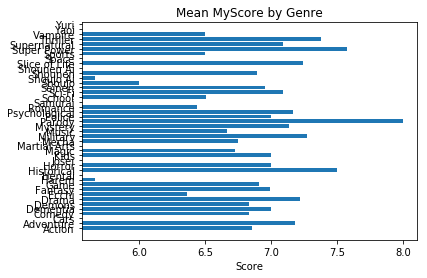

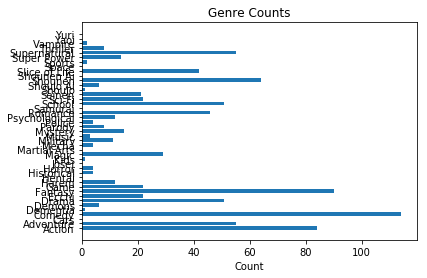

In [13]:
#Genre distribution
names_genre = ['Action','Adventure','Cars','Comedy','Dementia','Demons','Drama','Ecchi','Fantasy','Game','Harem', \
              'Hentai','Historical','Horror','Josei','Kids','Magic','Martial Arts','Mecha','Military','Music', \
              'Mystery','Parody','Police','Psychological','Romance','Samurai','School','Sci-Fi','Seinen','Shoujo', \
              'Shoujo Ai','Shounen','Shounen Ai','Slice of Life','Space','Sports','Super Power','Supernatural', \
              'Thriller','Vampire','Yaoi','Yuri']
len(names_genre)

#create a list of genre & myscore pairs
list_pairs_genre = [ [DFA.loc[j,'myscore'],i] for j in range(len(DFA)) for i in DFA['genres'][j]]
#initalize a list of list of genre scores
scores_genre = [ [] for i in range(len(names_genre))]

#populating scores_genre list with lists of all MyScores for each genre
for i in range(len(list_pairs_genre)):
    index  = names_genre.index(list_pairs_genre[i][1])
    scores_genre[index] = scores_genre[index] + [list_pairs_genre[i][0]]

    
mean_score_genre = [np.mean(i) for i in scores_genre]
count_score_genre = [len(i) for i in scores_genre]


plt.barh(names_genre,mean_score_genre)
plt.xlabel('Score')
plt.xlim(min(mean_score_genre)-0.1,max(mean_score_genre)+0.1)
plt.title('Mean MyScore by Genre')
plt.show()

plt.barh(names_genre,count_score_genre)
plt.xlabel('Count')
plt.title('Genre Counts')
plt.show()

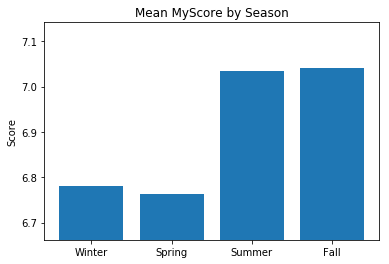

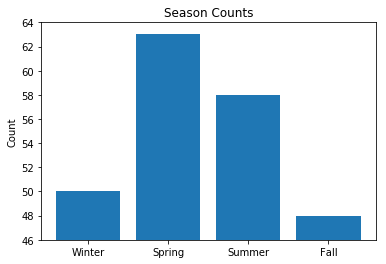

In [14]:
#Season distribution

#create a list of season & myscore pairs
list_pairs_season = [ [DFA.loc[j,'myscore'],DFA.loc[j,'season']] for j in range(len(DFA))]

#initalize a list of list of season scores
scores_season = [ [] for i in range(len(names_season))]

#populating scores_season list with lists of all MyScores for each season
for i in range(len(list_pairs_season)):
    index  = names_season.index(list_pairs_season[i][1])
    scores_season[index] = scores_season[index] + [list_pairs_season[i][0]]

    
mean_score_season = [np.mean(i) for i in scores_season]
count_score_season = [len(i) for i in scores_season]


plt.bar(names_season,mean_score_season)
plt.ylabel('Score')
plt.ylim(min(mean_score_season)-0.1,max(mean_score_season)+0.1)
plt.title('Mean MyScore by Season')
plt.show()

plt.bar(names_season,count_score_season)
plt.ylabel('Count')
plt.ylim(min(count_score_season)-2,max(count_score_season)+1)
plt.title('Season Counts')
plt.show()

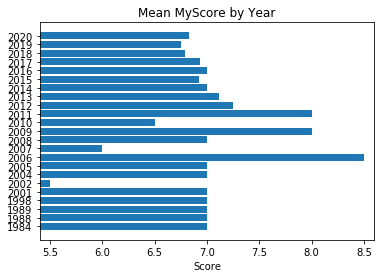

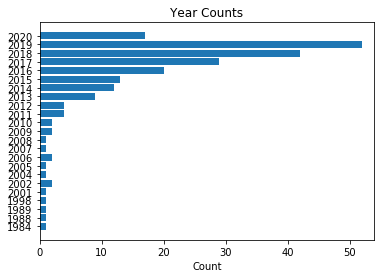

In [15]:
#Year distribution

#create a list of year & myscore pairs
list_pairs_year = [ [DFA.loc[j,'myscore'],DFA.loc[j,'year']] for j in range(len(DFA))]

#initalize a list of list of year scores
names_year = np.unique(DFA['year'])
names_year = names_year.tolist()
scores_year = [ [] for i in range(len(names_year))]

#populating scores_year list with lists of all MyScores for each year
for i in range(len(list_pairs_year)):
    index  = names_year.index(list_pairs_year[i][1])
    scores_year[index] = scores_year[index] + [list_pairs_year[i][0]]

    
mean_score_year = [np.mean(i) for i in scores_year]
count_score_year = [len(i) for i in scores_year]


plt.barh(names_year,mean_score_year)
plt.xlabel('Score')
plt.xlim(min(mean_score_year)-0.1,max(mean_score_year)+0.1)
plt.title('Mean MyScore by Year')
plt.show()

plt.barh(names_year,count_score_year)
plt.xlabel('Count')
plt.xlim(min(count_score_year)-1,max(count_score_year)+2)
plt.title('Year Counts')
plt.show()

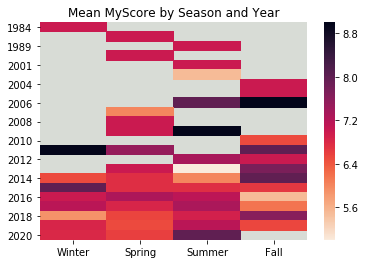

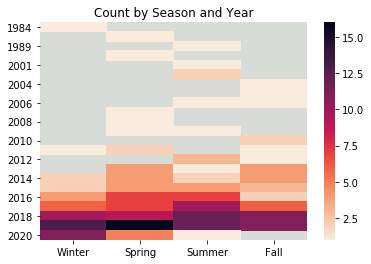

In [16]:
#Season & Year distribution

#create a list of year & myscore pairs
list_pairs_SY = [ [DFA.loc[j,'myscore'],DFA.loc[j,'season'],DFA.loc[j,'year']] for j in range(len(DFA))]

#initalize list of list of season & year scores
#1st layer is years matrixSY[0]; 2nd layer is seasons matrixSY[0][0]
scores_SY = [ [ [] for j in range(len(names_season))] for i in range(len(names_year))]

#populating matrixSY with lists of all MyScores for each season/year combination
for i in range(len(list_pairs_SY)):
    indexI  = names_year.index(list_pairs_SY[i][2])
    indexJ  = names_season.index(list_pairs_SY[i][1])
    scores_SY[indexI][indexJ] = scores_SY[indexI][indexJ] + [list_pairs_SY[i][0]]



#initializing mean_score_SY and count_score_SY
mean_score_SY = copy.deepcopy(scores_SY)
count_score_SY = copy.deepcopy(scores_SY)

for i in range(len(names_year)):
    for j in range(len(names_season)):
        mean_score_SY[i][j] = np.mean(scores_SY[i][j])
        count_score_SY[i][j] = len(scores_SY[i][j])
        

#convert list of lists into data frame for seaborn package
df_mean_score_SY = pd.DataFrame(mean_score_SY,columns=names_season,index=names_year)
df_count_score_SY = pd.DataFrame(count_score_SY,columns=names_season,index=names_year)

cmap = sns.cm.rocket_r #https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbara
ax = sns.heatmap(df_mean_score_SY,cmap=cmap)
ax.set_facecolor('xkcd:light grey') #color for NAs
plt.title('Mean MyScore by Season and Year')
plt.show()

cmap = sns.cm.rocket_r #https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbara
ax = sns.heatmap(df_count_score_SY.replace(0,np.nan),cmap=cmap)
ax.set_facecolor('xkcd:light grey') #color for NAs
plt.title('Count by Season and Year')
plt.show()

In [17]:
#Watchtime metrics, weighted scores

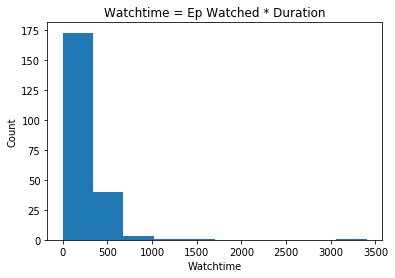

In [18]:
watchtimes = DFA.loc[:,'watched'] * DFA.loc[:,'duration']
plt.hist(watchtimes)
plt.xlabel('Watchtime')
plt.ylabel('Count')
plt.title('Watchtime = Ep Watched * Duration')
plt.show()

DFA['watchtime'] = watchtimes

In [19]:
#Straight watchtime*myscore is too naive, weighs longer shows too much
scoresW1 = watchtimes * DFA.loc[:,'myscore']
#Normalization of watchtimes by sqrt(watchtimes) transforms watchtime distribution from right skewed dist into more normal
scoresW2 = watchtimes/np.sqrt(watchtimes) * DFA.loc[:,'myscore']
#Standard Normalization of watchtimes transforms watchtime distribution from right skewed dist into more normal



DFA['scoreW1'] = scoresW1
DFA['scoreW2'] = scoresW2

(array([  1.,   0.,  13.,   5.,  21.,  17., 111.,  41.,   4.,   1.]),
 array([1.38629436, 2.06093557, 2.73557679, 3.410218  , 4.08485921,
        4.75950043, 5.43414164, 6.10878285, 6.78342406, 7.45806528,
        8.13270649]),
 <a list of 10 Patch objects>)

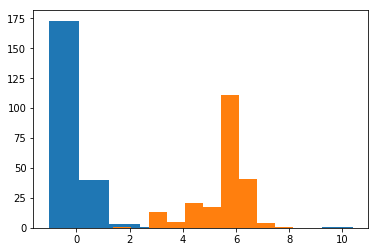

In [20]:
normalize_watchtimes = (watchtimes-np.mean(watchtimes))/np.std(watchtimes)
plt.hist(normalize_watchtimes)
#np.std(normalize_watchtimes)
plt.hist(np.log(watchtimes[watchtimes>0]))

In [21]:
np.log(watchtimes[watchtimes>0])
np.log(watchtimes)

C:\Users\Joshua Cho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


0      5.662960
1      5.662960
2      5.010635
3      5.075174
4      3.091042
5      4.969813
6      6.226537
7      6.354370
8      4.672829
9          -inf
10     5.620401
11     5.480639
12     4.779123
13     5.575949
14     6.173786
15     5.620401
16         -inf
17     5.620401
18     5.743003
19     6.354370
20     6.354370
21     5.700444
22     5.700444
23     5.620401
24     5.620401
25     5.620401
26     6.393591
27     5.620401
28     5.620401
29     6.746412
         ...   
189    4.736198
190    6.313548
191    4.234107
192    3.135494
193    6.396930
194    4.584967
195    4.454347
196    6.436150
197    5.620401
198    3.401197
199    5.620401
200    3.178054
201    4.969813
202    5.700444
203    5.662960
204    6.356108
205    5.743003
206    4.510860
207    3.526361
208    5.620401
209    3.091042
210    5.620401
211    6.476972
212    5.743003
213    5.743003
214    5.575949
215    5.662960
216    4.584967
217    5.662960
218    5.620401
Length: 219, dtype: floa

In [22]:
#find series/groups/franchises and links/associates them together
#create a matrix of page-links: page a links to pages b,c,d....
#containers = soup.findAll('table',attrs={'class':'anime_detail_related_anime'})

In [23]:
#%whos

In [24]:
#Export concatinated df to Excel
file_name_3 = 'DFA_%s.xlsx' % date
#DFA.to_excel(file_name_3)
DFA

,myscore,status,watched,id,episodes,title,type,premiered,genres,score,duration,season,year,diff,myscoreW,watchtime,scoreW1,scoreW2
0,6,Completed,12,38101,12,5-toubun no Hanayome,TV,Winter 2019,"[Harem, Comedy, Romance, School, Shounen]",7.62,24,Winter,2019,-1.62,1.00,288,1728,101.823376
1,4,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA,"Mar 9, 2018","[Action, Sci-Fi]",6.75,24,Winter,2018,-2.75,1.00,288,1152,67.882251
2,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA,"Apr 20, 2018","[Slice of Life, Comedy]",7.76,15,Spring,2018,0.24,0.50,150,1200,97.979590
3,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA,"Jun 14, 2019","[Comedy, Slice of Life]",7.84,16,Spring,2019,0.16,0.50,160,1280,101.192885
4,8,Completed,1,38815,1,Aggressive Retsuko: We Wish You a Metal Christmas,ONA,"Dec 20, 2018","[Slice of Life, Comedy]",7.33,22,Fall,2018,0.67,0.08,22,176,37.523326
5,8,Completed,12,34881,12,Aho Girl,TV,Summer 2017,"[Comedy, Romance, School, Shounen]",7.07,12,Summer,2017,0.93,0.50,144,1152,96.000000
6,7,Completed,22,24833,22,Ansatsu Kyoushitsu,TV,Winter 2015,"[Action, Comedy, School, Shounen]",8.16,23,Winter,2015,-1.16,1.00,506,3542,157.461106
7,7,Completed,25,30654,25,Ansatsu Kyoushitsu 2nd Season,TV,Winter 2016,"[Action, Comedy, School, Shounen]",8.59,23,Winter,2016,-1.59,1.00,575,4025,167.854103
8,7,Completed,1,1961,1,Arashi no Yoru ni,Movie,"Dec 10, 2005","[Adventure, Comedy, Drama, Fantasy]",7.74,107,Fall,2005,-0.74,0.50,107,749,72.408563
9,6,Watching,0,40128,0,Arte,TV,Spring 2020,"[Slice of Life, Historical, Drama, Romance, Se...",7.25,0,Spring,2020,-1.25,0.50,0,0,NaN
